In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten
from tensorflow.keras import datasets, layers, models

In [ ]:
#Load CIFAR-10 dataset
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
#Normalize the images to the range [0,1]
train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
#One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
print(f"Training data shape: {train_images.shape}")
print(f"Testing data shape: {test_images.shape}")

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [ ]:
model = models.Sequential([
    #First Convolutional Layer
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #Second Convolutional Layer
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Flatten the results to feed into a fully connected layer
    layers.Flatten(),

    #Fully Connected Layer
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    #Output Layer with softmax activation for multi-class classification
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=10,
                  validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.2710 - loss: 1.9393 - val_accuracy: 0.4942 - val_loss: 1.4115
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.4406 - loss: 1.5158 - val_accuracy: 0.5636 - val_loss: 1.2310
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4970 - loss: 1.3803 - val_accuracy: 0.5613 - val_loss: 1.2674
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5319 - loss: 1.3058 - val_accuracy: 0.6125 - val_loss: 1.1003
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5568 - loss: 1.2385 - val_accuracy: 0.6416 - val_loss: 1.0531
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5734 - loss: 1.1945 - val_accuracy: 0.6472 - val_loss: 1.0203
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5907 - loss: 1.1539 - val_accuracy: 0.6456 - val_loss: 1.0108
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6052 - loss: 1.1119 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6761 - loss: 0.9313
Test Accuracy: 0.6763


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select the first 5 images from the test set
test_images_subset = test_images[:5]
test_labels_subset = test_labels[:5]

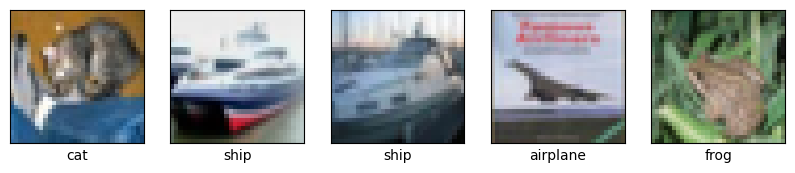

In [ ]:
# Dislpay the selected images
class_names = ['airplane','automobiles','bird','cat','deer',
               'dog','frog','horse','ship','truck']
plt.figure(figsize=(10,2))
for i in range(len(test_images_subset)):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images_subset[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[np.argmax(test_labels_subset[i])])
plt.show()

In [ ]:
#Generate prediction for the selected images
predictions = model.predict(test_images_subset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


In [ ]:
#Displays the predictions
for i in range(len(test_images_subset)):
  predicted_label = np.argmax(predictions[i])
  true_label = np.argmax(test_labels_subset[i])
  print(f"Image {i+1}:")
  print(f"True Label: {class_names[true_label]}")
  print(f"Predicted Label: {class_names[predicted_label]}")
  print()

Image 1:
True Label: cat
Predicted Label: cat

Image 2:
True Label: ship
Predicted Label: ship

Image 3:
True Label: ship
Predicted Label: ship

Image 4:
True Label: airplane
Predicted Label: airplane

Image 5:
True Label: frog
Predicted Label: frog



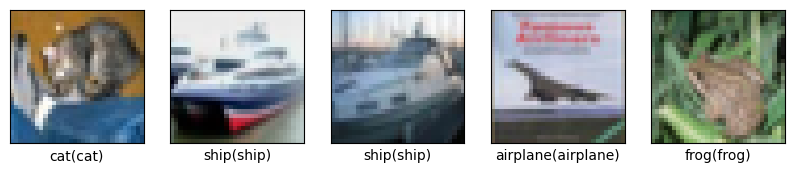

In [ ]:
#Visualize Prediction with Labels
plt.figure(figsize=(10,2))
for i in range(len(test_images_subset)):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images_subset[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(test_labels_subset[i])
  true_label = np.argmax(test_labels_subset[i])
  plt.xlabel(f"{class_names[predicted_label]}({class_names[true_label]})")
plt.show()